# 株式データを観察する。

この章では `時系列データ` である株式データについて考えて行きます。

### 事前準備

[個別株価データ、株価推移・過去データ・無料CSVダウンロード | 株式投資メモ・株価データベース](https://kabuoji3.com/stock/)からお好きな銘柄を4つダウンロード




In [93]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

stock0 = "/tmp/7201_2018.csv"
stock1 = "/tmp/6758_2018.csv"
stock2 = "/tmp/3436_2018.csv"
stock3 = "/tmp/8306_2018.csv"

df_stock0 = pd.read_csv(stock0, skiprows=[0], encoding='shift-jis', index_col="日付", parse_dates=True)
df_stock1 = pd.read_csv(stock1, skiprows=[0], encoding='shift-jis', index_col="日付", parse_dates=True)
df_stock2 = pd.read_csv(stock2, skiprows=[0], encoding='shift-jis', index_col="日付", parse_dates=True)
df_stock3 = pd.read_csv(stock3, skiprows=[0], encoding='shift-jis', index_col="日付", parse_dates=True)

df_stock_list = [df_stock0, df_stock1, df_stock2, df_stock3,]
stock_name_list = ["NISSAN", "SONY", "SUMCO", "MUFG",]

all_data = pd.concat(df_stock_list, 
                    keys=stock_name_list,
                    names=['Ticker', 'Date'])

df_close = all_data["終値調整値"].reset_index().pivot('Date', 'Ticker', '終値調整値')

In [62]:
# データ確認
df_close.tail()

Ticker,MUFG,NISSAN,SONY,SUMCO
Date,,,,
2018-11-07,673.5,1021.0,6105.0,1631.0
2018-11-08,684.8,1030.0,6259.0,1697.0
2018-11-09,685.4,1027.0,6248.0,1642.0
2018-11-12,680.0,1029.0,6056.0,1638.0
2018-11-13,666.5,1008.5,5893.0,1573.0


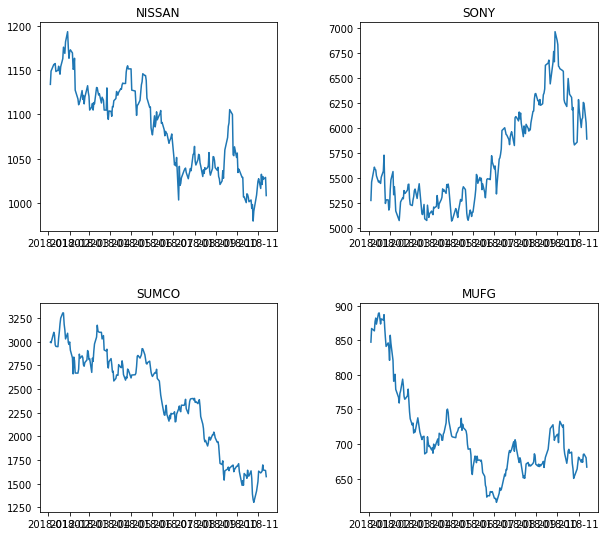

In [78]:
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(df_close["NISSAN"])
ax2.plot(df_close["SONY"])
ax3.plot(df_close["SUMCO"])
ax4.plot(df_close["MUFG"])

ax1.set_title("NISSAN")
ax2.set_title("SONY")
ax3.set_title("SUMCO")
ax4.set_title("MUFG")

fig.subplots_adjust(wspace=0.35, hspace=0.35, bottom=0.2)


In [112]:
def myplot(df, tate_hako = 2, ):
    
    fig = plt.figure(figsize=(10,10))
    
    num = len(df.columns)
    x_box_num = tate_hako
    y_box_num = num / x_box_num
    
    for i, s in enumerate(df.columns):
        ax = fig.add_subplot(x_box_num, y_box_num, i+1)
        ax.plot(df.iloc[:, i])
        ax.grid()
        ax.set_title(df.columns[i])
        # x軸の rotate 方法、だれか教えて。。。
    
    fig.subplots_adjust(wspace=0.35, hspace=0.35, bottom=0.2)
    
    
    

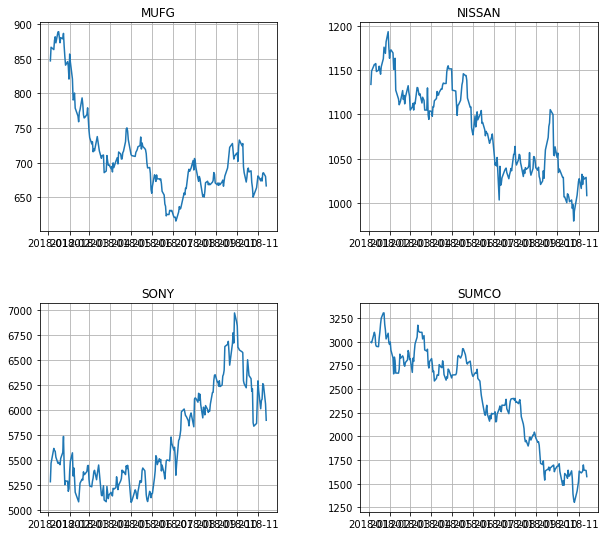

In [77]:
myplot(df_close, )


In [82]:
# 4つの株価についてサッと確認
df_close.describe()

Ticker,MUFG,NISSAN,SONY,SUMCO
count,212.000000,212.00000,212.000000,212.000000
mean,711.765566,1085.70000,5687.141509,2403.617925
std,63.624985,49.95124,478.079242,516.075466
min,615.600000,979.70000,5073.000000,1301.000000
25%,671.950000,1039.37500,5298.250000,1982.250000
50%,695.350000,1092.75000,5489.000000,2584.500000
75%,727.625000,1125.50000,6060.500000,2815.000000
max,889.300000,1193.50000,6966.000000,3305.000000


In [84]:
# この期間に置いて各銘柄の変動幅を確認
# Sony と SUMCOは方向は違うが、大体2000円くらい幅があるので同じ位の変動幅と思ってしまいがちだが
df_close.describe().loc["max"] / df_close.describe().loc["min"] - 1

Ticker
MUFG      0.444607
NISSAN    0.218230
SONY      0.373152
SUMCO     1.540354
dtype: float64

In [87]:
# 価格帯が違う株価を比べる場合は、「基準化」をする必要がある。
# 基準化その1
# データ取得日からの変化率を見る

df_close / df_close.loc["2018-01-04"]-1


Ticker,MUFG,NISSAN,SONY,SUMCO
Date,,,,
2018-01-04,0.000000,0.000000,0.000000,0.000000
2018-01-05,0.023256,0.013228,0.035045,-0.002336
2018-01-09,0.019242,0.019841,0.063080,0.034713
2018-01-10,0.035061,0.019841,0.059102,0.024700
2018-01-11,0.041081,0.020723,0.057776,-0.009680
2018-01-12,0.030693,0.012787,0.046600,-0.015020
2018-01-15,0.049227,0.014109,0.034855,-0.016021
2018-01-16,0.049817,0.018078,0.036939,0.014686
2018-01-17,0.039901,0.013668,0.034097,0.036382


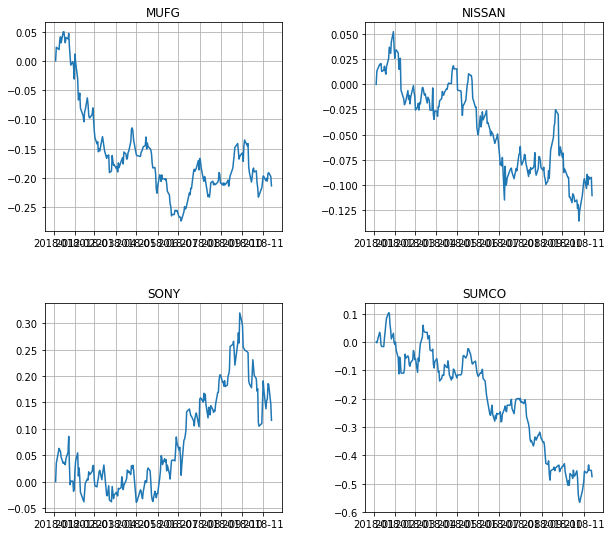

In [90]:
myplot(df_close / df_close.loc["2018-01-04"]-1, )

In [95]:
# この方法だと、分析期間が変わるたびに変更する必要がある。
# 期間全体における変動幅は見やすいが、日々の変動は見えにくい。

# 基準化その２
# 前日を基準とし毎日の収益率（＝変化率）を見る。

df_close.pct_change()


Ticker,MUFG,NISSAN,SONY,SUMCO
Date,,,,
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,0.023256,0.013228,0.035045,-0.002336
2018-01-09,-0.003922,0.006527,0.027086,0.037136
2018-01-10,0.015520,0.000000,-0.003742,-0.009677
2018-01-11,0.005817,0.000865,-0.001252,-0.033550
2018-01-12,-0.009978,-0.007775,-0.010566,-0.005393
2018-01-15,0.017982,0.001306,-0.011222,-0.001017
2018-01-16,0.000563,0.003913,0.002014,0.031208
2018-01-17,-0.009446,-0.004331,-0.002740,0.021382


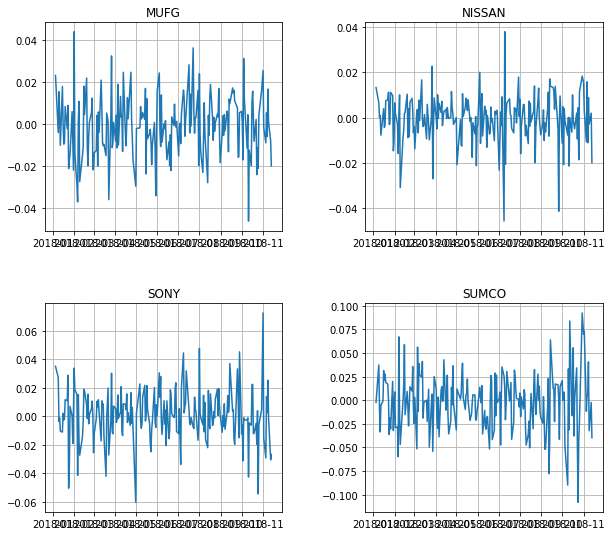

In [96]:
myplot(df_close.pct_change() )

In [103]:
## これだと、価格帯の違う株価を比べる事が出来ないので、対数化する。
## これを**対数化収益率** と呼ぶ
(df_close / df_close.shift(1)).apply(np.log)


Ticker,MUFG,NISSAN,SONY,SUMCO
Date,,,,
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,0.022990,0.013141,0.034444,-0.002339
2018-01-09,-0.003930,0.006506,0.026726,0.036463
2018-01-10,0.015401,0.000000,-0.003749,-0.009725
2018-01-11,0.005800,0.000864,-0.001253,-0.034126
2018-01-12,-0.010029,-0.007806,-0.010622,-0.005407
2018-01-15,0.017822,0.001305,-0.011285,-0.001017
2018-01-16,0.000562,0.003905,0.002012,0.030731
2018-01-17,-0.009491,-0.004340,-0.002744,0.021156


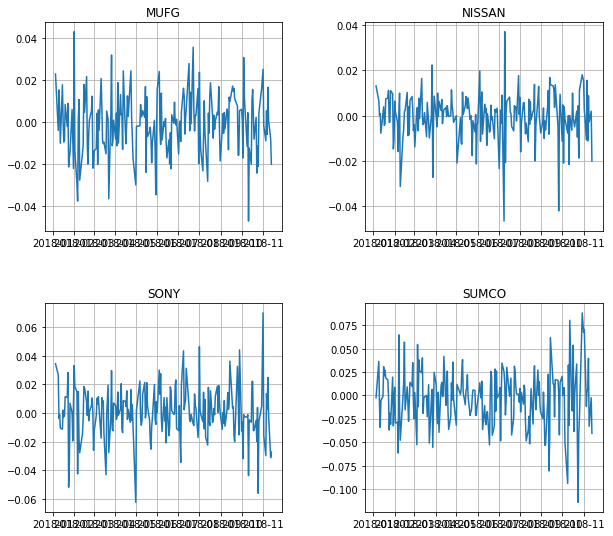

In [113]:
myplot((df_close / df_close.shift(1)).apply(np.log))
# 誰かsharey 教えて

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb35745d30>,
      dtype=object)

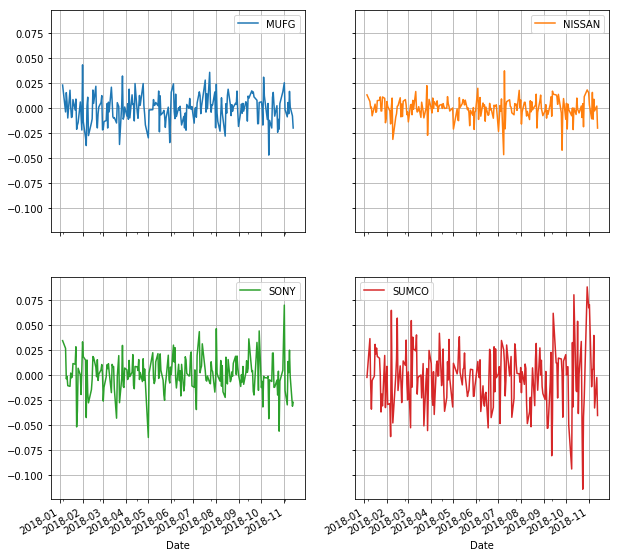

In [120]:
(df_close / df_close.shift(1)).apply(np.log).plot(subplots=True, 
                                                  sharey=True, 
                                                  layout=(2, 2), 
                                                  figsize=(10,10),
                                                 grid=True)

In [122]:
##毎日の変動率（収益率）を時系列に並べ、縦軸を合わせると、どの銘柄が毎日大きく変動するか見える。
## 日産に比べてSUMCOの変動率は非常に大きい事がわかりました。
## 変動率が大きいことを **ボラティリティが高い（ボラタイル）** と表現します。

## 視覚に訴えるグラフは主観が入りやすい
## 客観的にデータを捉える方法を考える。

## describeを使って、毎日の収益率の基本統計量を確認
df_close.pct_change().describe()


Ticker,MUFG,NISSAN,SONY,SUMCO
count,211.000000,211.000000,211.000000,211.000000
mean,-0.001136,-0.000556,0.000521,-0.003054
std,0.014247,0.010342,0.017922,0.029658
min,-0.047135,-0.046724,-0.062467,-0.114255
25%,-0.010100,-0.004984,-0.008613,-0.021380
50%,0.000000,0.000000,0.000319,-0.001017
75%,0.006226,0.005378,0.010738,0.014060
max,0.043158,0.037168,0.069993,0.088228


In [132]:
## 標準偏差(std)に注目
## たとえば、NISSANが1.0％、SUMUCOは2.9％と約３倍違う。
## 日産に比べてSUMUCOは３倍毎日ドキドキしなくてはいけない、と見ることができる。
## ３倍ハイリスクハイリターンとも言えるかもしれない。

## 上記で**ボラティリティが高い（ボラタイル）** という話をしましたが
## それを数字で示した指数をボラティリティと言います。
## ボラティリティは、価格変動の大きさを示す指標で定義はいくつか有りますが、ここでは、
## 収益率データの標準偏差を使うことにします。つまりstd です。

## この std は散らばり具合を表します。
## 散らばり具合とは、ざっくりですが、平均からのどのくらい散らばっているかと考えます。
## そして、今後の収益率も 平均±std の範囲に68.27％の確率で収まる可能性があると考える事にしてしまいます。
## つまり sumco の今後の収益率は、68.27％の確率で以下の範囲に入るでしょう、と考える事にしてしまいます。

sumco = df_close.pct_change().describe()["SUMCO"]
sumco.loc["mean"] - sumco.loc["std"], sumco.loc["mean"] + sumco.loc["std"]


(-0.032162972484472356, 0.02693738601685871)

In [134]:
## ではそれを可視化してみましょう
from scipy.stats import norm